# Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from scripts.helper_functions import *

The Artic Sea Ice Extent dataset tracks the total region with at least 15% sea ice cover from 1978 through 2018. This dataset was found on data.world, but its original source is the [National Snow & Ice Data Center](https://nsidc.org/data/explore-data). I chose this dataset because I wanted to look at the effects of climate change. <br><br>
The dataset contains two columns: Date and Extent (million sq km) and contains 12751 samples. The extent column, which is measured in million square kilometers, was record every 2 days between October 1978 and March 2018.

In [2]:
# Importing the data
sea_ice_df = pd.read_csv('./data/arctic_sea_ice_extent.csv')
sea_ice_df.head()

,Date,Extent (million sq km)
0,10/26/1978,10.231
1,10/28/1978,10.420
2,10/30/1978,10.557
3,11/1/1978,10.670
4,11/3/1978,10.777


In [3]:
sea_ice_df.shape

(12751, 2)

In [4]:
# Update column names
sea_ice_df = convert_column_names(sea_ice_df)

Reformatted column names: Index(['date', 'extent_million_sq_km'], dtype='object')


In [5]:
# Create year and month columns
sea_ice_df['year'] = pd.DatetimeIndex(sea_ice_df['date']).year
sea_ice_df['month'] = pd.DatetimeIndex(sea_ice_df['date']).month

In [6]:
# View the data
sea_ice_df.head(-10)

,date,extent_million_sq_km,year,month
0,10/26/1978,10.231,1978,10
1,10/28/1978,10.420,1978,10
2,10/30/1978,10.557,1978,10
3,11/1/1978,10.670,1978,11
4,11/3/1978,10.777,1978,11
...,...,...,...,...
12736,3/17/2018,14.466,2018,3
12737,3/18/2018,14.349,2018,3
12738,3/19/2018,14.309,2018,3
12739,3/20/2018,14.210,2018,3


In [11]:
# Count nulls
sea_ice_df.isna().sum(0)

date                    0
extent_million_sq_km    0
year                    0
month                   0
dtype: int64

No missing values in the original and additional columns.

In [13]:
# Count values per year
sea_ice_df.groupby('year')['extent_million_sq_km'].count()

year
1978     34
1979    182
1980    183
1981    183
1982    182
1983    183
1984    183
1985    182
1986    183
1987    220
1988    354
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018     90
Name: extent_million_sq_km, dtype: int64

From first glance, measurements were taken approximately every 2 days from 1978 to 1987. From 1988 to 2018, there is a daily measurement recorded, which means the frequency of recordings was increased two-fold.

In [14]:
# Plot number of values per column
# sns.countplot(sea_ice_df, x="date", hue="year")

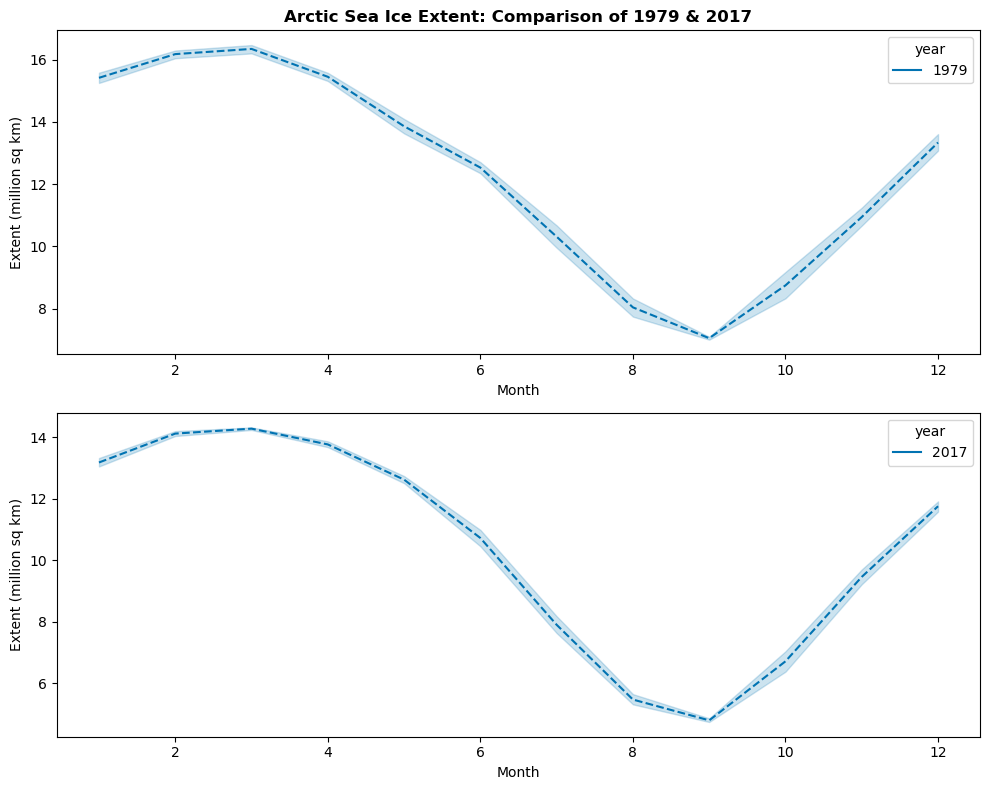

In [7]:
# Filtering data for specific years (assuming 'sea_ice_df' is your DataFrame)
sea_ice_1979 = sea_ice_df[sea_ice_df['year'] == 1979]
sea_ice_2017 = sea_ice_df[sea_ice_df['year'] == 2017]

# Create subplots with two rows and one column
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot for 1978 on the first subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_1979, hue='year', linestyle='dashed', palette='colorblind', ax=axes[0])
axes[0].set_title('Arctic Sea Ice Extent: Comparison of 1979 & 2017', fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Extent (million sq km)')

# Plot for 2018 on the second subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_2017, hue='year', linestyle='dashed', palette='colorblind', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Extent (million sq km)')

plt.tight_layout()  # Adjust subplots to prevent overlap

# Show plot
plt.show()